#### Importing Required Libraries

- In this cell, we import the necessary libraries for data manipulation and visualization: pandas for data handling, matplotlib for plotting, and seaborn for enhanced visualizations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Data
- In this cell, we load the dataset from a CSV file into a pandas DataFrame for further analysis.

In [2]:
path = r'./src/train.csv'
df = pd.read_csv(path)

#### Descriptive Statistical Analysis
- This cell computes and displays descriptive statistics for the dataset, giving insights into the data distribution, counts, means, and other relevant metrics.


In [3]:
desc_stats = df.describe(include='all')
print("Descriptive Statistics:")
print(desc_stats)

Descriptive Statistics:
             User_ID Product_ID  Gender     Age     Occupation City_Category  \
count   5.500680e+05     550068  550068  550068  550068.000000        550068   
unique           NaN       3631       2       7            NaN             3   
top              NaN  P00265242       M   26-35            NaN             B   
freq             NaN       1880  414259  219587            NaN        231173   
mean    1.003029e+06        NaN     NaN     NaN       8.076707           NaN   
std     1.727592e+03        NaN     NaN     NaN       6.522660           NaN   
min     1.000001e+06        NaN     NaN     NaN       0.000000           NaN   
25%     1.001516e+06        NaN     NaN     NaN       2.000000           NaN   
50%     1.003077e+06        NaN     NaN     NaN       7.000000           NaN   
75%     1.004478e+06        NaN     NaN     NaN      14.000000           NaN   
max     1.006040e+06        NaN     NaN     NaN      20.000000           NaN   

       Stay_In_

#### Checking Missing Values
- Here, we check for missing values in each column of the DataFrame and print the counts to identify potential data quality issues.

In [4]:
missing_values = df.isnull().sum()
print('\nMissing Values by Column:')
print(missing_values)


Missing Values by Column:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


#### Analyzing Unique Values in Each Column
- This cell iterates through each column and prints the unique values present, which helps understand the categorical data in the dataset.

In [5]:
print('\nUnique Values by Column:')
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in column {column}:')
    print(unique_values)
    print()


Unique Values by Column:
Unique values in column User_ID:
[1000001 1000002 1000003 ... 1004113 1005391 1001529]

Unique values in column Product_ID:
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

Unique values in column Gender:
['F' 'M']

Unique values in column Age:
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Unique values in column Occupation:
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

Unique values in column City_Category:
['A' 'C' 'B']

Unique values in column Stay_In_Current_City_Years:
['2' '4+' '3' '1' '0']

Unique values in column Marital_Status:
[0 1]

Unique values in column Product_Category_1:
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]

Unique values in column Product_Category_2:
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]

Unique values in column Product_Category_3:
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]

Unique values in column Pu

#### Purchase Distribution Visualization
- In this cell, we create a histogram to visualize the distribution of purchase amounts, which helps identify patterns and outliers in the data.

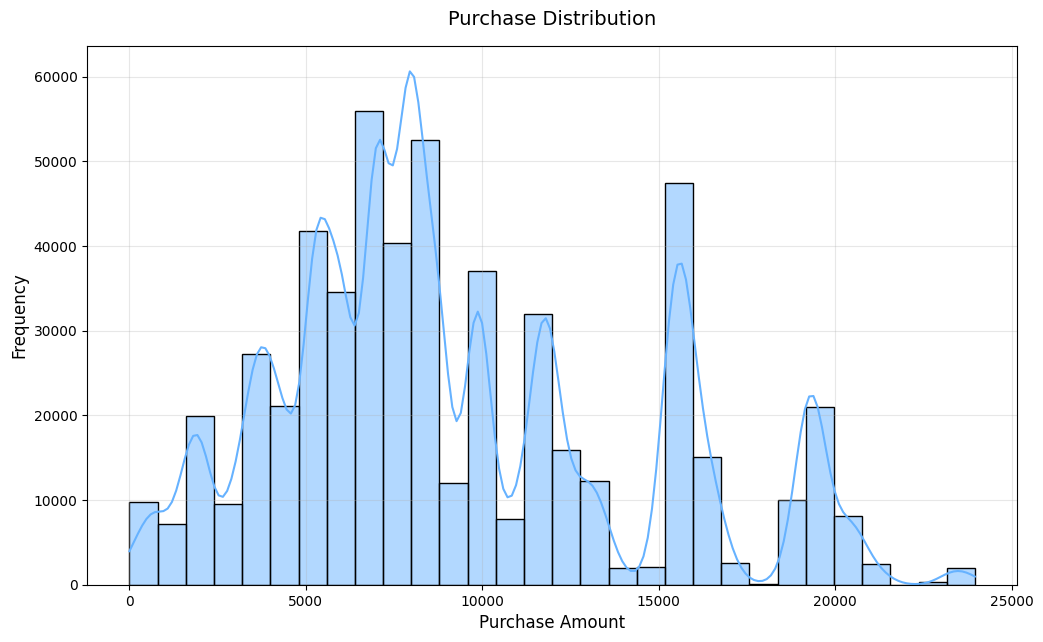

In [6]:
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Purchase', bins=30, color='#66B2FF', kde=True)
plt.title('Purchase Distribution', fontsize=14, pad=15)
plt.xlabel('Purchase Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

#### Purchase Boxplot Visualization
- This cell generates a boxplot to visualize the spread and identify outliers in the purchase amounts, providing a clearer picture of the data's distribution.

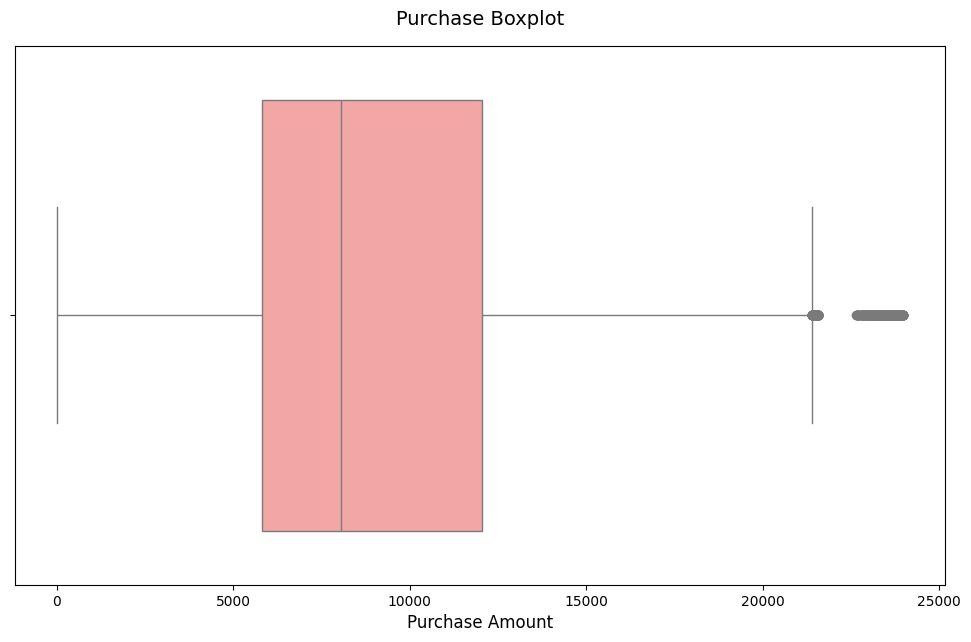

In [7]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=df['Purchase'], color='#FF9999')
plt.title('Purchase Boxplot', fontsize=14, pad=15)
plt.xlabel('Purchase Amount', fontsize=12)
plt.show()


#### Outlier Analysis
- This cell calculates the interquartile range (IQR) to identify outliers in the purchase amounts and prints the limits along with the count of outliers detected.

In [8]:
mean_purchase = df['Purchase'].mean()
std_purchase = df['Purchase'].std()
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
outliers = df[(df['Purchase'] < lower_limit) | (df['Purchase'] > upper_limit)]
print("\nOutlier Analysis:")
print(f"Lower Limit: {lower_limit:.2f}")
print(f"Upper Limit: {upper_limit:.2f}")
print(f"Number of Outliers: {len(outliers)}")



Outlier Analysis:
Lower Limit: -3523.50
Upper Limit: 21400.50
Number of Outliers: 2677


#### Purchases by Gender Visualization
- This cell groups the data by gender and visualizes the total purchases using a bar plot, which provides insights into spending patterns based on gender.

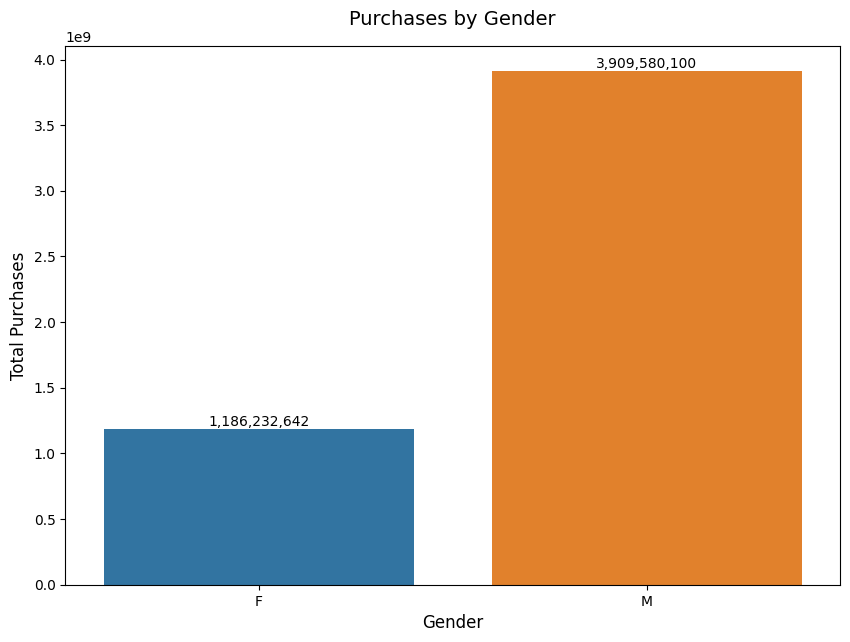

In [9]:
plt.figure(figsize=(10, 7))
gender_purchase = df.groupby('Gender')['Purchase'].sum().reset_index()
ax = sns.barplot(data=gender_purchase, x='Gender', y='Purchase', hue='Gender', legend=False)
plt.title('Purchases by Gender', fontsize=14, pad=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Purchases', fontsize=12)
# Adding values on bars
for i, v in enumerate(gender_purchase['Purchase']):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom')
plt.show()


#### Purchases by Marital Status Visualization
- This cell visualizes the total purchases based on marital status, allowing us to compare the spending habits of married and unmarried individuals.

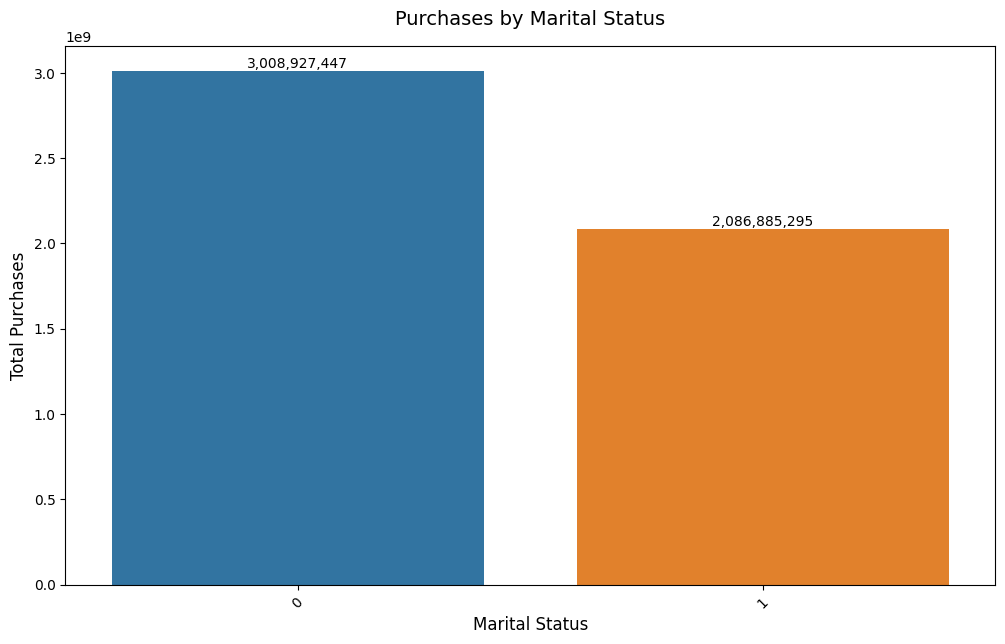

In [10]:
# Purchases by Marital Status
plt.figure(figsize=(12, 7))
marital_status_purchase = df.groupby('Marital_Status')['Purchase'].sum().reset_index()
ax = sns.barplot(data=marital_status_purchase, x='Marital_Status', y='Purchase', hue='Marital_Status', legend=False)
plt.title('Purchases by Marital Status', fontsize=14, pad=15)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Total Purchases', fontsize=12)
plt.xticks(rotation=45)
# Adding values on bars
for i, v in enumerate(marital_status_purchase['Purchase']):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom')
plt.show()

#### Purchases by Occupation Visualization
- In this cell, we analyze the total purchases by occupation, which helps understand how different job types influence spending.

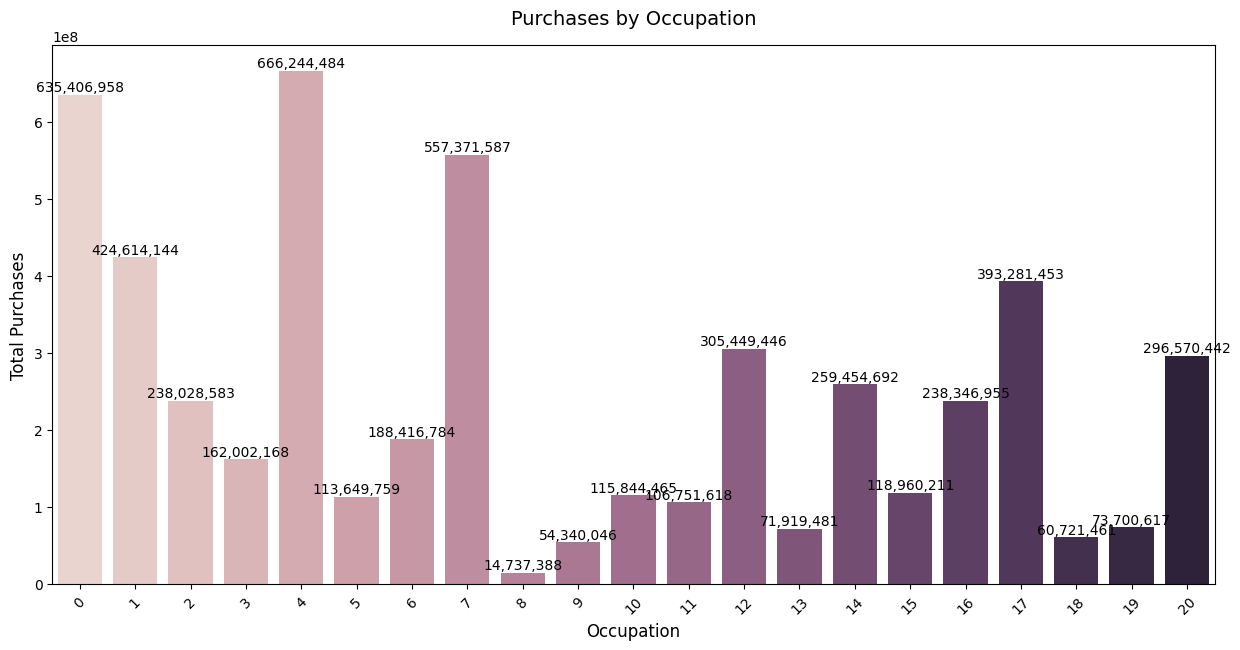

In [11]:
plt.figure(figsize=(15, 7))
occupation_purchase = df.groupby('Occupation')['Purchase'].sum().reset_index()
ax = sns.barplot(data=occupation_purchase, x='Occupation', y='Purchase', hue='Occupation', legend=False)
plt.title('Purchases by Occupation', fontsize=14, pad=15)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Total Purchases', fontsize=12)
plt.xticks(rotation=45)
# Adding values on bars
for i, v in enumerate(occupation_purchase['Purchase']):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom')
plt.show()

#### Average Purchases by Occupation Visualization
- This cell visualizes the average purchase amounts by occupation, providing insights into how income levels may affect spending.

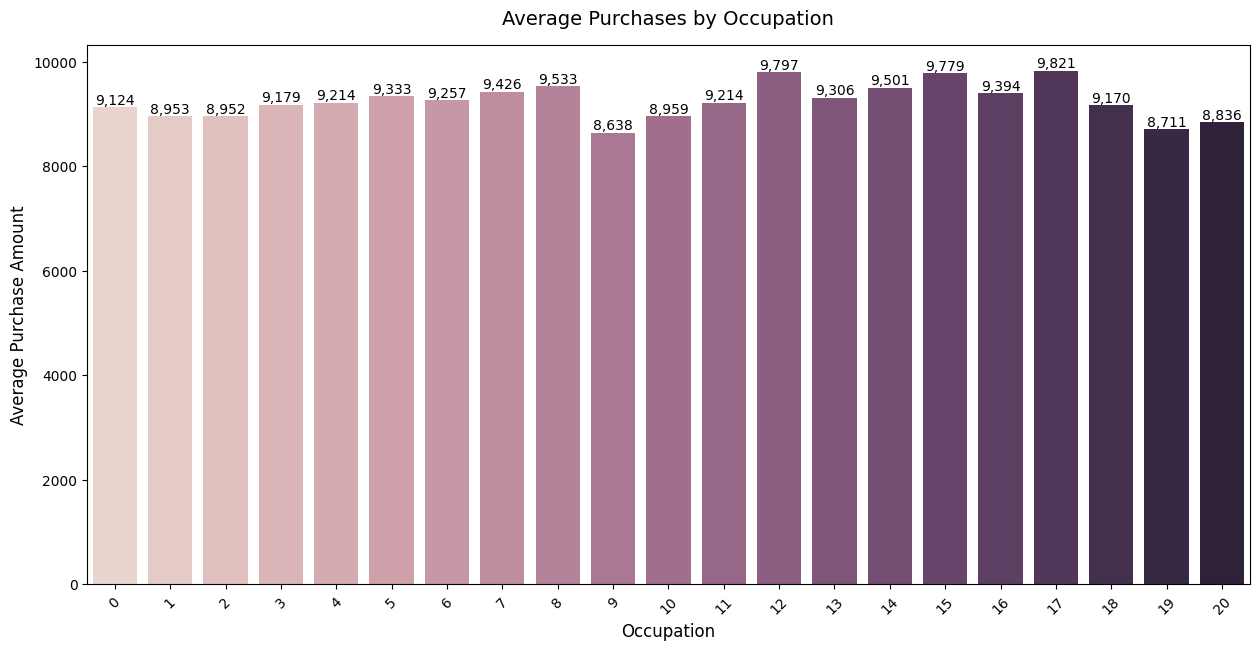

In [12]:
plt.figure(figsize=(15, 7))
avg_purchase_by_occupation = df.groupby('Occupation')['Purchase'].mean().reset_index()
ax = sns.barplot(data=avg_purchase_by_occupation, x='Occupation', y='Purchase', hue='Occupation', legend=False)
plt.title('Average Purchases by Occupation', fontsize=14, pad=15)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Average Purchase Amount', fontsize=12)
plt.xticks(rotation=45)
# Adding values on bars
for i, v in enumerate(avg_purchase_by_occupation['Purchase']):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom')
plt.show()

#### Purchases by City Visualization
- This cell examines total purchases based on city categories, revealing geographic differences in spending patterns.

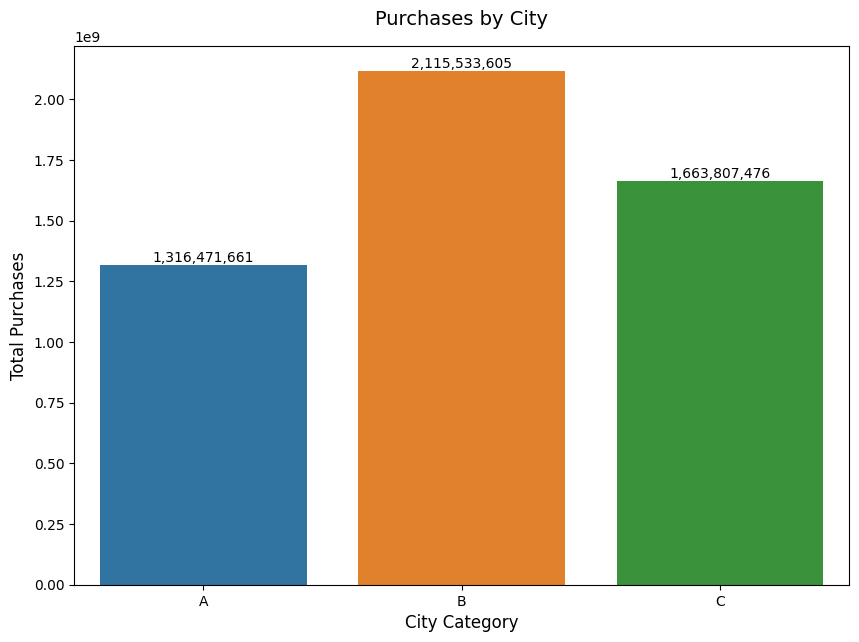

In [13]:
plt.figure(figsize=(10, 7))
city_purchase = df.groupby('City_Category')['Purchase'].sum().reset_index()
ax = sns.barplot(data=city_purchase, x='City_Category', y='Purchase', hue='City_Category', legend=False)
plt.title('Purchases by City', fontsize=14, pad=15)
plt.xlabel('City Category', fontsize=12)
plt.ylabel('Total Purchases', fontsize=12)
# Adding values on bars
for i, v in enumerate(city_purchase['Purchase']):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom')
plt.show()

#### Purchases by Age Group Visualization
- This cell visualizes total purchases segmented by age groups, helping to identify trends in spending across different age demographics.

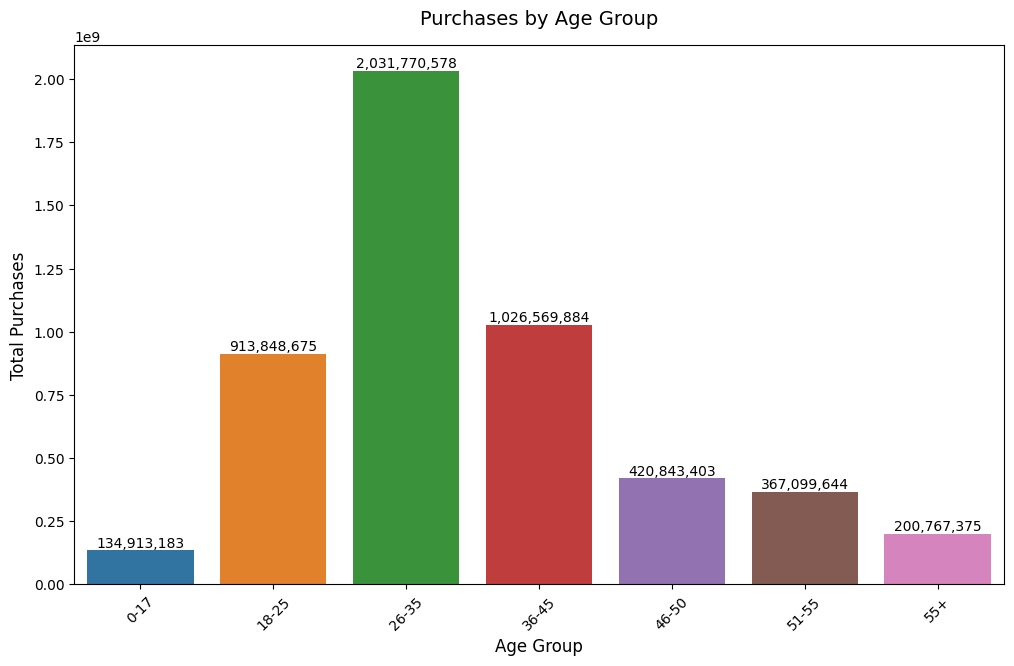

In [14]:
plt.figure(figsize=(12, 7))
age_purchase = df.groupby('Age')['Purchase'].sum().reset_index()
ax = sns.barplot(data=age_purchase, x='Age', y='Purchase', hue='Age', legend=False)
plt.title('Purchases by Age Group', fontsize=14, pad=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Purchases', fontsize=12)
plt.xticks(rotation=45)
# Adding values on bars
for i, v in enumerate(age_purchase['Purchase']):
    ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom')
plt.show()